# Data Analyst -  Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Read and Clean Data

In [2]:
df = pd.read_csv("Resources/DataAnalyst.csv", index_col=0, encoding='utf-8')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [3]:
df.shape

(2253, 15)

In [4]:
df.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object

In [5]:
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [6]:
# Deleting the row with Null value
df[df['Company Name'].isnull()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
1860,Data Analyst,$53K-$99K (Glassdoor est.),"Kindred at Home, part of the Kindred at Home f...",-1.0,NaN,"Mooresville, NC",-1,-1,-1,-1,-1,-1,-1,-1,-1


In [7]:
df.drop(index=[1860], inplace=True)

In [8]:
# Check if the Null value was deleted
df[df['Company Name'].isnull()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply


### 'Salary Estimate' column

In [9]:
# Salary Estimate
df['Salary Estimate'].unique()

array(['$37K-$66K (Glassdoor est.)', '$46K-$87K (Glassdoor est.)',
       '$51K-$88K (Glassdoor est.)', '$51K-$87K (Glassdoor est.)',
       '$59K-$85K (Glassdoor est.)', '$43K-$76K (Glassdoor est.)',
       '$60K-$110K (Glassdoor est.)', '$41K-$78K (Glassdoor est.)',
       '$45K-$88K (Glassdoor est.)', '$73K-$127K (Glassdoor est.)',
       '$84K-$90K (Glassdoor est.)', '$27K-$52K (Glassdoor est.)',
       '$42K-$74K (Glassdoor est.)', '$77K-$132K (Glassdoor est.)',
       '$98K-$114K (Glassdoor est.)', '$48K-$96K (Glassdoor est.)',
       '$26K-$47K (Glassdoor est.)', '$31K-$59K (Glassdoor est.)',
       '$47K-$81K (Glassdoor est.)', '$43K-$69K (Glassdoor est.)',
       '$49K-$112K (Glassdoor est.)', '$30K-$54K (Glassdoor est.)',
       '$55K-$103K (Glassdoor est.)', '$37K-$70K (Glassdoor est.)',
       '$57K-$103K (Glassdoor est.)', '$35K-$45K (Glassdoor est.)',
       '$42K-$66K (Glassdoor est.)', '$65K-$81K (Glassdoor est.)',
       '$113K-$132K (Glassdoor est.)', '$42K-$63K (Glas

##### There is 1 irregular value which is "-1".

In [10]:
# Check the row with the value "-1"
df[df['Salary Estimate'] == str(-1)]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
2149,Configuration/Data Management Analyst III,-1,Job Description\nPosition Title: Configuration...,4.4,Protingent\n4.4,"Kent, WA","Bellevue, WA",51 to 200 employees,2001,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),-1,-1


In [11]:
# Dlete the row with the value "-1"
df.drop(index=[2149], inplace=True)

In [12]:
# Loop the column and split by Space between. Add the first value into salary list
salary = []
for i in df['Salary Estimate']:
    salary.append(i.split(' ')[0])

In [13]:
df['Salary Estimate'] = salary
df['Salary Estimate'][:5]

0    $37K-$66K
1    $37K-$66K
2    $37K-$66K
3    $37K-$66K
4    $37K-$66K
Name: Salary Estimate, dtype: object

In [14]:
df['Salary Estimate'] = df['Salary Estimate'].replace({"\$":""}, regex = True)
df['Salary Estimate'] = df['Salary Estimate'].replace({"K":"*1000"}, regex = True)
df['Salary Estimate'] = df['Salary Estimate'].replace({"-":"+"}, regex = True)
df['Salary Estimate'] = "(" + df['Salary Estimate'] + ")"
df['Salary Estimate'] = df['Salary Estimate'] + "/2"
df['Salary Estimate']

0        (37*1000+66*1000)/2
1        (37*1000+66*1000)/2
2        (37*1000+66*1000)/2
3        (37*1000+66*1000)/2
4        (37*1000+66*1000)/2
                ...         
2248    (78*1000+104*1000)/2
2249    (78*1000+104*1000)/2
2250    (78*1000+104*1000)/2
2251    (78*1000+104*1000)/2
2252    (78*1000+104*1000)/2
Name: Salary Estimate, Length: 2251, dtype: object

In [15]:
df['Salary Estimate'] = df['Salary Estimate'].map(lambda x: eval(x))
df['Salary Estimate'] = df['Salary Estimate'].astype(int)

In [16]:
# Converted to mean of the Salary (ex: Mean of 37K-66K)
df['Salary Estimate']

0       51500
1       51500
2       51500
3       51500
4       51500
        ...  
2248    91000
2249    91000
2250    91000
2251    91000
2252    91000
Name: Salary Estimate, Length: 2251, dtype: int32

In [17]:
df.rename(columns={'Salary Estimate':"avg_salary"}, inplace=True)

### 'Company Name' Column

In [18]:
# Removing right letters from "\n"
df['Company Name'].unique()[:50]

array(['Vera Institute of Justice\n3.2',
       'Visiting Nurse Service of New York\n3.8', 'Squarespace\n3.4',
       'Celerity\n4.1', 'FanDuel\n3.9', 'Point72\n3.9', 'Two Sigma\n4.4',
       'GNY Insurance Companies\n3.7', 'DMGT\n4.0', 'Riskified\n4.4',
       'NYU Langone Health\n4.0', 'BulbHead', 'Montefiore Medical\n3.7',
       'Known\n3.0', 'Advisor Group\n3.4', 'CodeGreen Solutions\n3.6',
       'Undertone\n3.8', 'NYSTEC\n3.8',
       'Education Development Center, Inc.\n3.9',
       'Teachers Pay Teachers\n4.9', 'Google\n4.4',
       'MUSIC & Entertainment', 'Macquarie Group\n3.3', 'Andiamo\n3.5',
       'Dash Technologies Inc\n3.8', 'Hearst Communications\n4.0',
       'Duolingo\n5.0', 'Ro\n4.8', 'Endai\n3.7', 'BlueLabs\n4.7',
       'Revel\n3.6', 'NALLAS CORPORATION\n3.6', 'Pozent\n3.5',
       'SoFi\n3.2', 'Carry1st', 'Bank of America\n3.7', 'Clear Street',
       'Nutech Information Systems\n3.6', 'The Trevor Project\n4.6',
       'Pinto', 'AB InBev', 'Whip Media Group\n5.0

In [19]:
df['company_name'] = df.apply(lambda x: x['Company Name'] if x['Rating'] < 0 else x['Company Name'].split("\n")[0], axis=1)
df['company_name'][:10]

0             Vera Institute of Justice
1    Visiting Nurse Service of New York
2                           Squarespace
3                              Celerity
4                               FanDuel
5                               Point72
6                             Two Sigma
7               GNY Insurance Companies
8                                  DMGT
9                             Riskified
Name: company_name, dtype: object

### 'Location' Column

In [20]:
# Take out state Part and make new column
df['state'] = df['Location'].map(lambda x: x.split(',')[1])
df['state'].value_counts()

 CA          626
 TX          394
 NY          345
 IL          164
 PA          114
 AZ           97
 NC           89
 CO           88
 NJ           86
 WA           53
 VA           48
 OH           35
 UT           33
 FL           27
 IN           23
 DE           11
 Arapahoe      8
 GA            4
 KS            3
 SC            3
Name: state, dtype: int64

### 'Industry' Column

In [21]:
df['Industry'] = df['Industry'].map(lambda x: 'Others' if x =="-1" else x)

In [22]:
df['Industry'].value_counts()

Others                              352
IT Services                         325
Staffing & Outsourcing              322
Health Care Services & Hospitals    151
Computer Hardware & Software        111
                                   ... 
Trucking                              1
Audiovisual                           1
Stock Exchanges                       1
Express Delivery Services             1
Pet & Pet Supplies Stores             1
Name: Industry, Length: 89, dtype: int64

# Analyze Data

###  Number of Job posting by State

In [23]:
# Changing State Names
df['state'].unique()

array([' NY', ' NJ', ' UT', ' CA', ' VA', ' FL', ' IL', ' TX', ' AZ',
       ' PA', ' DE', ' OH', ' NC', ' SC', ' IN', ' WA', ' GA', ' KS',
       ' CO', ' Arapahoe'], dtype=object)

In [24]:
df['state'] = df['state'].replace(" NY","New York")
df['state'] = df['state'].replace(" NJ", "New Jersey")
df['state'] = df['state'].replace(" UT", "Utah")
df['state'] = df['state'].replace(" CA", "California")
df['state'] = df['state'].replace(" VA", "Virginia")
df['state'] = df['state'].replace(" FL", "Florida")
df['state'] = df['state'].replace(" IL", "Illinois")
df['state'] = df['state'].replace(" TX", "Texas")
df['state'] = df['state'].replace(" AZ", "Arizona")
df['state'] = df['state'].replace(" PA", "Pennsylvania")
df['state'] = df['state'].replace(" DE", 'Delaware')
df['state'] = df['state'].replace(" OH", 'Ohio')
df['state'] = df['state'].replace(" NC", 'North Carolina')
df['state'] = df['state'].replace(" SC", 'South Carolina')
df['state'] = df['state'].replace(" IN", 'Indiana')
df['state'] = df['state'].replace(" WA", 'Washington')
df['state'] = df['state'].replace(" GA", 'Georgia')
df['state'] = df['state'].replace(" KS", 'Kansas')
df['state'] = df['state'].replace(" CO", 'Colorado')

In [25]:
df['state']

0       New York
1       New York
2       New York
3       New York
4       New York
          ...   
2248    Colorado
2249    Colorado
2250    Colorado
2251    Colorado
2252    Colorado
Name: state, Length: 2251, dtype: object

In [26]:
num_state = pd.DataFrame(df['state'].value_counts())
num_state

,state
California,626
Texas,394
New York,345
Illinois,164
Pennsylvania,114
Arizona,97
North Carolina,89
Colorado,88
New Jersey,86
Washington,53


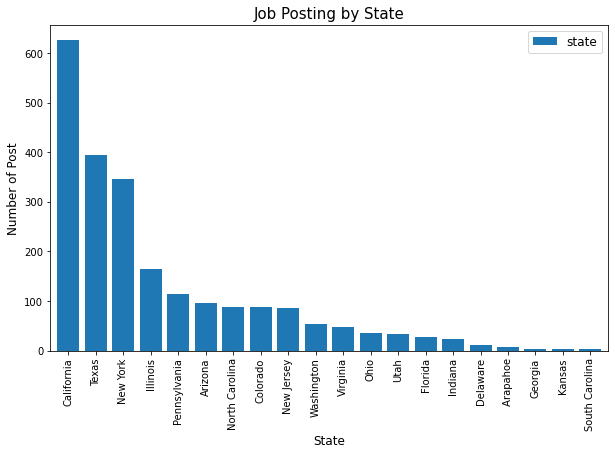

In [27]:
num_state.plot(kind='bar', width=0.8,figsize=(10, 6))
plt.title("Job Posting by State", fontsize=15)
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Post", fontsize=12)
plt.legend(fontsize=12)
plt.show()

###  Average Salary by State

In [28]:
state_salary = pd.DataFrame(df.groupby('state')['avg_salary'].mean().sort_values(ascending=False))
state_salary

,avg_salary
state,
California,88432.108626
Illinois,78310.975610
Colorado,73619.318182
New Jersey,73000.000000
Arapahoe,72250.000000
New York,71411.594203
Arizona,70788.659794
South Carolina,68333.333333
North Carolina,68022.471910


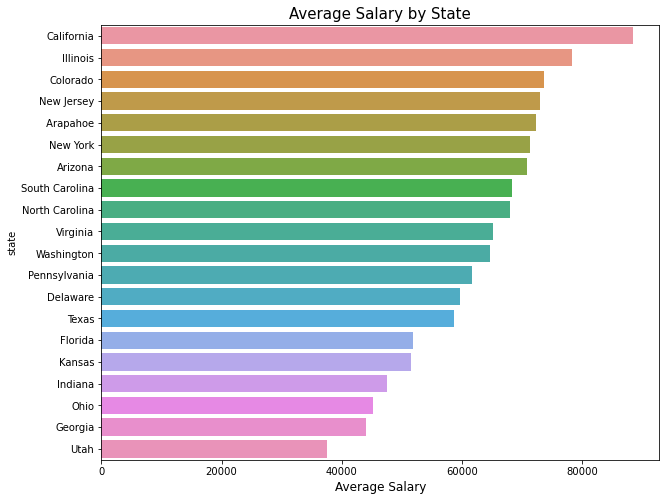

In [29]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='avg_salary',y=state_salary.index,data=state_salary, ax=ax)
ax.set_title("Average Salary by State", fontsize=15)
ax.set_xlabel('Average Salary', fontsize=12)
plt.show()

# Industry 

<ipython-input-30-ec5d2bd7ac94>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


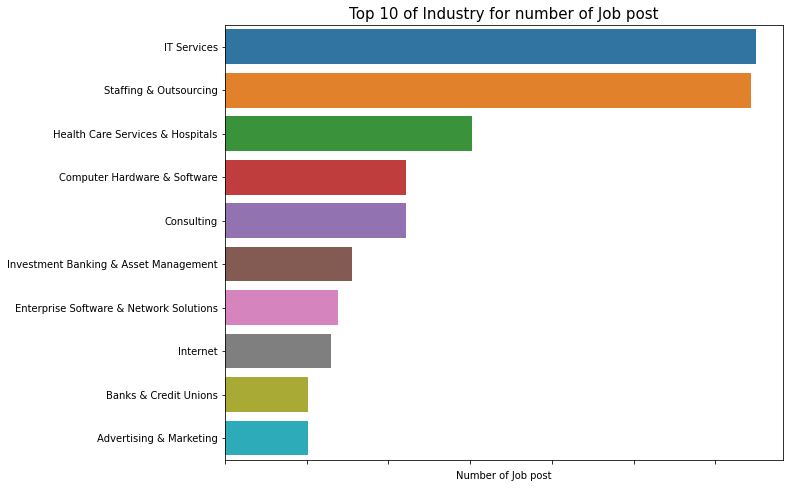

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(y='Industry', data=df, order=df['Industry'].value_counts()[1:11].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Number of Job post")
ax.set_ylabel("")
ax.set_title("Top 10 of Industry for number of Job post", fontsize=15)
plt.show()

# Job Title

In [31]:
job_salary = pd.DataFrame(df.groupby("Job Title")['avg_salary'].mean().sort_values(ascending=False)[:20])
job_salary

,avg_salary
Job Title,
Senior Data Analyst Studio Finance Engineering,150000.0
AI Insights Data Analyst,150000.0
Sr. Data Analyst - Growth & Adoption,150000.0
"Data Analyst, Autonomy Operations",150000.0
"Data Analyst (SQL, Hive)",150000.0
"Data Analyst, Product Insights",150000.0
Data Analyst with Data Mapping and API,150000.0
Senior HR Data Analyst,150000.0
Tableau Data Analyst Intern,150000.0


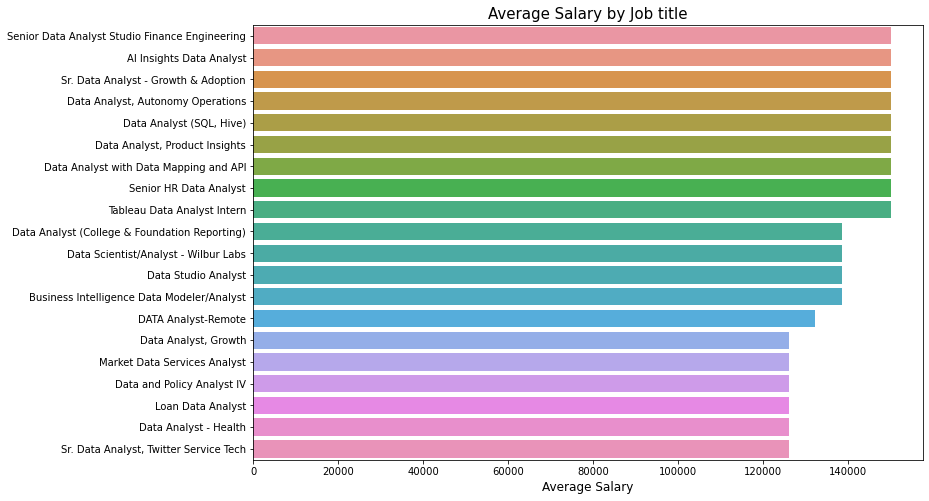

In [32]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x='avg_salary', y=job_salary.index ,data=job_salary)

ax.set_xlabel("Average Salary", fontsize=12)
ax.set_ylabel("")
ax.set_title("Average Salary by Job title", fontsize=15)

plt.show()

In [33]:
df.drop(columns='Founded', inplace=True)

# Correlation between Average Salary and Rating

In [34]:
corr = df.corr()

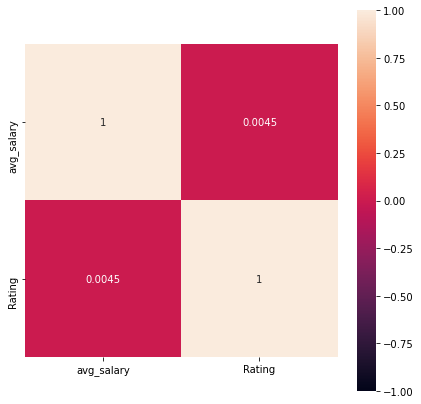

In [35]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, square=True)
plt.show()